In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load DataSet

In [22]:
from sklearn.datasets import load_digits
data = load_digits()

## Target Name

In [23]:
data["target_names"]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [24]:
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

## Display an image from the dataset

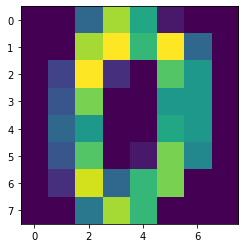

In [32]:
plt.imshow(data.images[0])

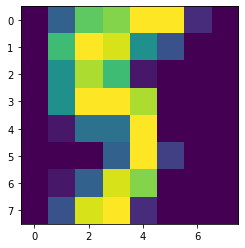

In [37]:
plt.imshow(data.images[15])

## Display the value of the crossponding image at the position

In [38]:
data.target[15]

5

## Data to DataFrame with Target column

In [53]:
df = pd.DataFrame(data.data)
df["target"] = data.target

In [54]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


## Split - data into Train-Test

In [176]:
from sklearn.model_selection import train_test_split

In [204]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.33, random_state=42)

In [205]:
from sklearn.neighbors import KNeighborsClassifier

In [206]:
knn = KNeighborsClassifier(n_neighbors=10)

In [207]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_ss = scaler.fit_transform(X_train)
X_test_ss = scaler.transform(X_test)

In [208]:
model = knn.fit(X_train_ss,y_train)

In [209]:
pred = model.predict(X_test_ss)

## MSE and MAE

In [210]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [211]:
mean_squared_error(y_test,pred)

0.5959595959595959

In [212]:
mean_absolute_error(y_test,pred)

0.11447811447811448

## Accuracy Score

In [213]:
from sklearn.metrics import accuracy_score
accuracy_score(np.array(y_test),np.array(pred).astype(int))

0.9713804713804713

In [214]:
import pickle

In [215]:
pickle.dump(model,open("knnmodel.pk","wb"))

In [216]:
md = pickle.load(open("knnmodel.pk","rb"))

In [217]:
md.predict(np.array(scaler.transform(X_test))[0].reshape(1,-1))

array([6])

## Save image

array([6])

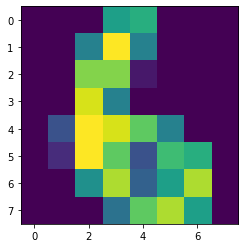

In [266]:
i = 65
plt.imshow(data.images[i])
md.predict(data.images[i].reshape(1,-1))

In [267]:
cv2.imwrite("6n.png",data.images[i])

True

## import image and predict

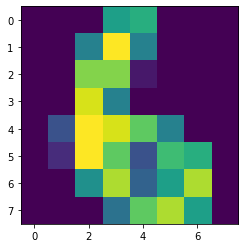

In [257]:
import cv2
img_name = "6n.png"
img = cv2.imread(img_name,cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

In [258]:
img.shape

(8, 8)

## resize the image

In [259]:
rsimg = cv2.resize(img,(8,8))

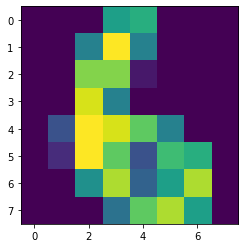

In [260]:
plt.imshow(rsimg)

In [261]:
md.predict(rsimg.reshape(1,-1))

array([6])

In [262]:
md.predict(scaler.transform(rsimg.reshape(1,-1)))

array([6])